In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error, 
    r2_score
)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
X = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/X_USDINR.csv')
X.drop('Unnamed: 0', axis=1, inplace=True)
X.head()

,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,0.002716,0.004312,0.002460,0.000000,0.000000,0.000000,0.0,0.435743,0.428316,0.501290,0.001107,0.000439,0.029707
1,0.003467,0.003890,0.006787,0.000164,0.000083,0.000042,0.0,0.440006,0.429330,0.511641,0.001107,0.000439,0.029707
2,0.000000,0.011124,0.007768,0.000344,0.000177,0.000090,0.0,0.443880,0.431063,0.518980,0.001107,0.000439,0.029707
3,0.000854,0.004946,0.007238,0.000315,0.000165,0.000085,0.0,0.441573,0.431901,0.509839,0.001107,0.000439,0.029707
4,0.003747,0.004596,0.002107,0.000587,0.000307,0.000158,0.0,0.447507,0.433982,0.522539,0.001107,0.000439,0.029707


In [3]:
y = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/Y_USDINR.csv')
y.drop('Unnamed: 0', axis=1, inplace=True)
y.head()

,Closing_price
0,61.400
1,61.495
2,61.508
3,61.391
4,61.565


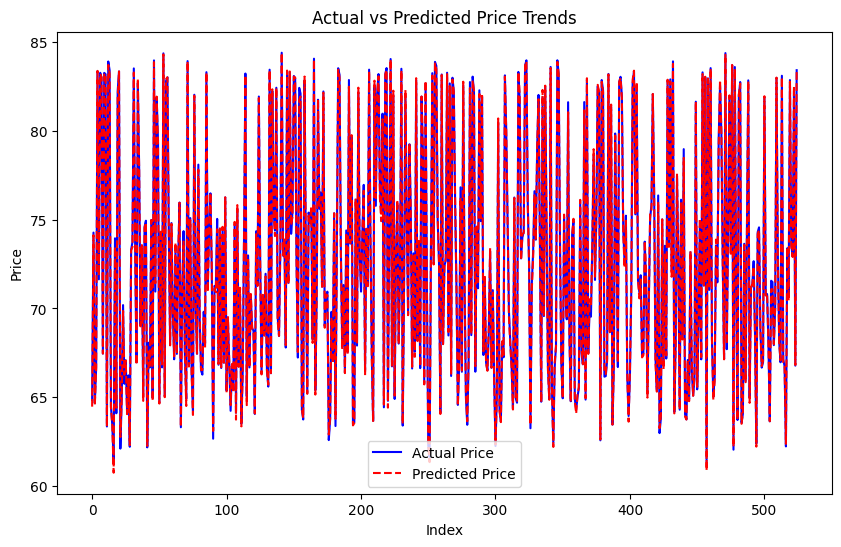

In [4]:
def mlpRegressor_model(X,y): 
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the MLPRegressor (Neural Network model)

    mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

    # Fit the model to the training data
    mlp_model.fit(X_train, y_train)

    # Predict the target values on the test data
    y_pred = mlp_model.predict(X_test)

    # Evaluate the model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlp_metrics = {
        "Metric": [
            "Mean Absolute Error (MAE)", 
            "Mean Squared Error (MSE)",
            "Mean Absolute Percentage Error (MAPE)", 
            "R-squared (R²)"
        ],
        "Testing": [
            mae, 
            mse,
            mape * 100, 
            r2
        ]
    }
    mlp_metrics_df = pd.DataFrame(mlp_metrics)

    # Plot actual vs predicted trends
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label="Actual Price", color="blue")
    plt.plot(np.arange(len(y_pred)), y_pred, label="Predicted Price", color="red", linestyle="dashed")
    plt.title("Actual vs Predicted Price Trends")
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

    return mlp_metrics_df

mlp_metrics_df = mlpRegressor_model(X,y)

with CrossValidation

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

def mlpRegressor_model_cv(X, y): 
    # Initialize the MLPRegressor (Neural Network model)
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(150,), 
        max_iter=2000, 
        random_state=42,
        activation='relu'
    )

    # Define cross-validation strategy
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store metrics
    mae_scores = []
    mse_scores = []
    mape_scores = []
    r2_scores = []

    for train_idx, test_idx in cv.split(X):
        # Split data into training and testing for each fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit the model
        mlp_model.fit(X_train, y_train)

        # Predict
        y_pred = mlp_model.predict(X_test)

        # Calculate metrics
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mse_scores.append(mean_squared_error(y_test, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    # Average metrics across all folds
    mean_mae = np.mean(mae_scores)
    mean_mse = np.mean(mse_scores)
    mean_mape = np.mean(mape_scores)
    mean_r2 = np.mean(r2_scores)

    # Prepare metrics in DataFrame format
    mlp_metrics_cv = {
        "Metric": [
            "Mean Absolute Error (MAE)", 
            "Mean Squared Error (MSE)", 
            "Mean Absolute Percentage Error (MAPE)", 
            "R-squared (R²)"
        ],
        "Cross-Validation Scores": [
            mean_mae, 
            mean_mse, 
            mean_mape * 100, 
            mean_r2
        ]
    }

    mlp_metrics_cv_df = pd.DataFrame(mlp_metrics_cv)
    return mlp_metrics_cv_df

# Example usage
mlp_metrics_cv_df = mlpRegressor_model_cv(X, y)

In [6]:
mlp_metrics_df

,Metric,Testing
0,Mean Absolute Error (MAE),0.151440
1,Mean Squared Error (MSE),0.041237
2,Mean Absolute Percentage Error (MAPE),0.211275
3,R-squared (R²),0.999092


In [7]:
mlp_metrics_cv_df

,Metric,Cross-Validation Scores
0,Mean Absolute Error (MAE),0.157022
1,Mean Squared Error (MSE),0.044827
2,Mean Absolute Percentage Error (MAPE),0.219508
3,R-squared (R²),0.999036
